# 2D Trajectory Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Virtual-Environment-and-Navigation-Task" data-toc-modified-id="Virtual-Environment-and-Navigation-Task-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Virtual Environment and Navigation Task</a></span></li></ul></li><li><span><a href="#Trajectory-Data-and-Target-Path-Categories-(Labels)" data-toc-modified-id="Trajectory-Data-and-Target-Path-Categories-(Labels)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trajectory Data and Target Path Categories (Labels)</a></span><ul class="toc-item"><li><span><a href="#Read-Trajectory-Data" data-toc-modified-id="Read-Trajectory-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read Trajectory Data</a></span></li><li><span><a href="#Read-Trajectory-Labels" data-toc-modified-id="Read-Trajectory-Labels-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read Trajectory Labels</a></span></li><li><span><a href="#Heatmap-of-Locations-in-Trial-9" data-toc-modified-id="Heatmap-of-Locations-in-Trial-9-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Heatmap of Locations in Trial 9</a></span></li><li><span><a href="#Discretize-Paths" data-toc-modified-id="Discretize-Paths-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Discretize Paths</a></span></li></ul></li><li><span><a href="#Classification-Model-Development-and-Validation" data-toc-modified-id="Classification-Model-Development-and-Validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification Model Development and Validation</a></span><ul class="toc-item"><li><span><a href="#Route-Representation" data-toc-modified-id="Route-Representation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Route Representation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Decision-Tree-Based-on-Domain-Knowledge" data-toc-modified-id="Decision-Tree-Based-on-Domain-Knowledge-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree Based on Domain Knowledge</a></span><ul class="toc-item"><li><span><a href="#Model-Development" data-toc-modified-id="Model-Development-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Model Development</a></span></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Model Validation</a></span></li></ul></li><li><span><a href="#Supervised-Learning:-Random-Forests" data-toc-modified-id="Supervised-Learning:-Random-Forests-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Supervised Learning: Random Forests</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

### Background
This project aims to extract spatial features of 2D spatial trajectories taken by 395 participants navigating in a virtual maze. Based on these features, researchers can classify these trajectories and answer corresponding cognitive scientific questions. 

According to literature on human spatial cognition, there is a spectrum of individual differences in environmental learning ability. That is to say, after the same exposure to a new environment, some people can establish a very good sense of direction in the environment. Others may be totally lost when doing a navigation task, including finding a shortcut to get to a certain target in the environment.

Classifying paths taken by different participants in a virtual environment can reveal individual differences in learning the environment. Also, using navigation data collected in a virtual maze, researchers can further study what factors influence people's different navigation behaviors. For instance, firemen can investigate whether risk-taking and stressors influence people's navigation behaviors facing fire conflagrations. Architects can have a good sense of how different structures of mazes may influence people's mental images of the built environment. GPS developers can understand what kind of directions users need when navigating in an unfamiliar environment.

### Virtual Environment and Navigation Task

395 participants learned a 3D virtual environment by following a fixed route for 5 laps (as shown in the image below) using mouse and keyboards. Yellow line indicates the learned route participants followed during the learning phase. Stars indicate the objects in the maze (12 in total) (image source: Marchette et al., (2011)).

In [1]:
from IPython.display import Image
Image("sketch_one.png")

Participants never saw the overhead view of the maze. They only learned it by navigating in the maze from the first-person view, as shown in the image below.

In [2]:
Image("view_two.png")

After learning the maze by following the fixed route (the learned route) for 5 times, they started to do the task: starting from one object and freely navigating to a target object by using mouse and keyboard. There are 20 trials in total. On each trial, they were transported to a new object and were instructed on the name of the target object. People's trajectories were recorded. There are two main paths people choose to find the target object shown in the following image.

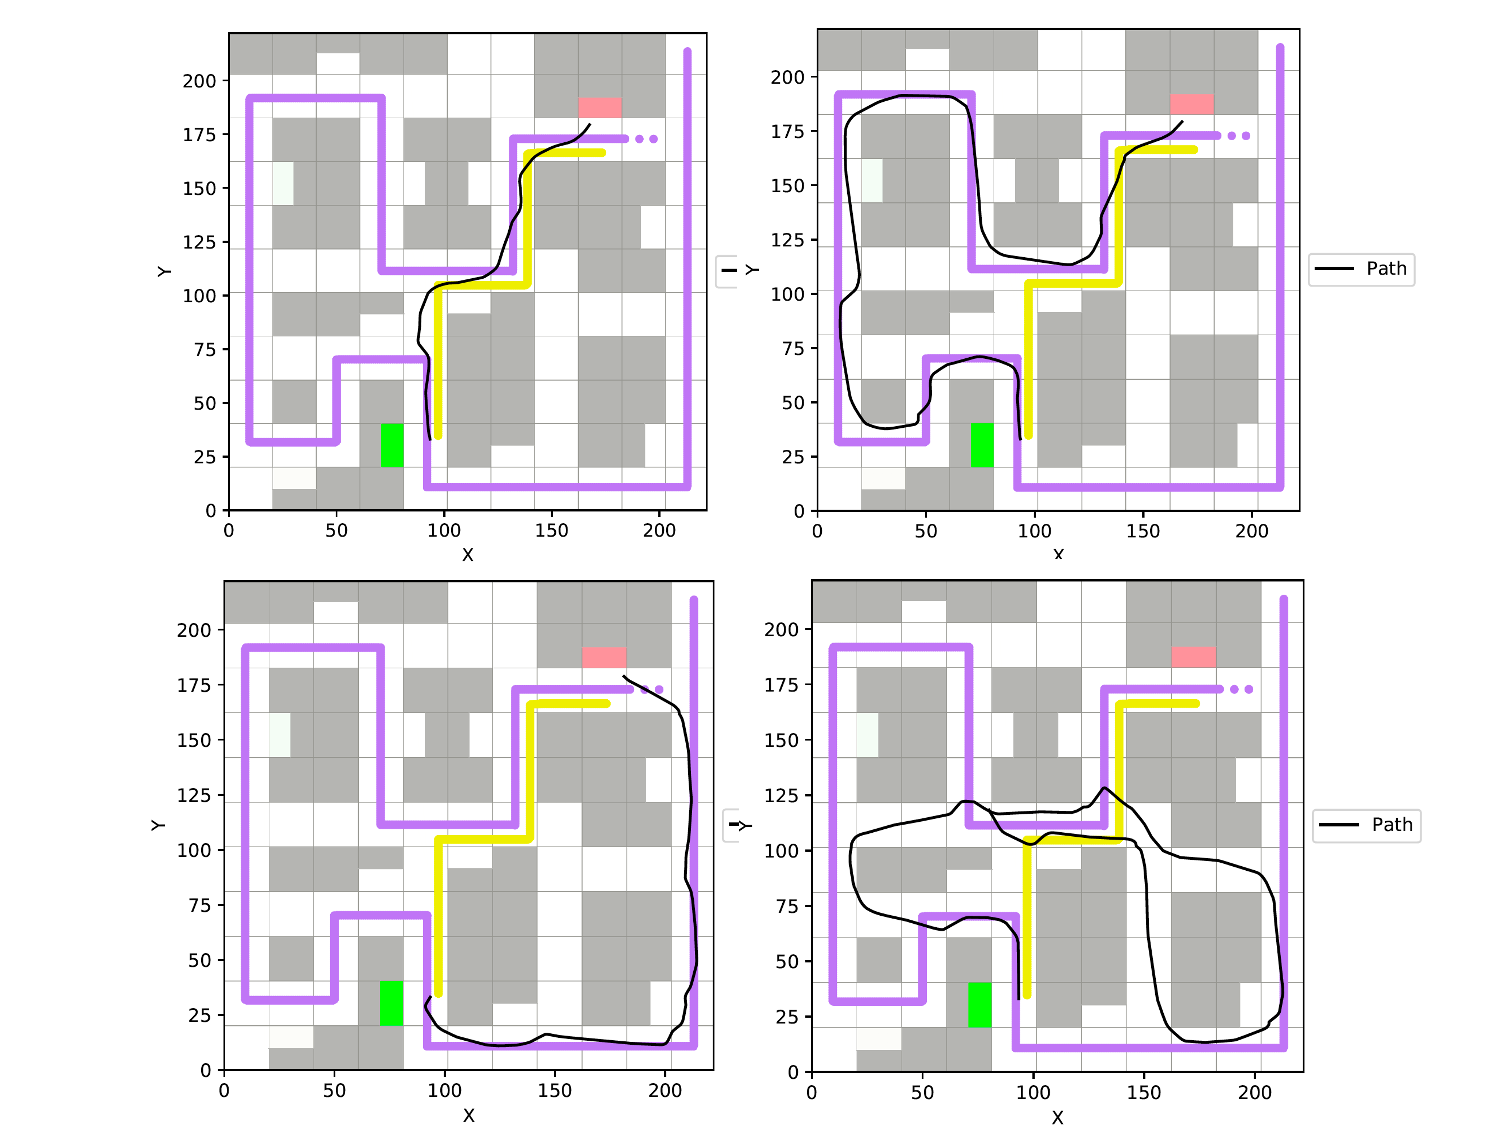

In [3]:
Image('sample_three.png')

In the sample trial above (Trial 9), participants started at the green object and were asked to navigate to the red object. Some participants might take a route simliar to the yellow path, or a shortcut, as shown in the top left graph. If people took this path, it suggests that they developed a good sense of direction or relatively accurate mental image of the spatial relation of these two objects. Some participants may take the top right path, or a learned route. It indicates that people follow the route they learned before to get to the target location. It suggests that the mental image developed is structured by paths or they acquired route knowledge of the environment. Participants may also take the bottom left path, which indicates that they retraced the path they learned (reversed learned route). People may also failed to find the target (the red object), as shown in the bottom right image, and the path should be classified as a failure. People may also do something in between such as the paths can be classified as a shortcut liberally or a learned route liberally. 

By classifying paths into shortcut, learned route, reversed learned route and others, researchers can further link these route choice behaviors to their other cognitive ability or emotional and motivational dispositions, such as stressor or self-confidence. Being dedicated to these studies, researchers have been developing better and better understanding of spatial cognitions, which supports other applied studies including architectures, urban planning, GPS and virtual environments design.

## Trajectory Data and Target Path Categories (Labels)

The data used in the project was collected in the past 5 years in Hegarty Spatial Thinking Lab in University of California Santa Barbara for purposes of different research projects (Boone, Gong & Hegarty, 2018; Boone, Maghen & Hegarty, 2019; He, Boone & Hegarty, In preparation). 

The experiment was administered using a Dell XPS with a GeForce GTX 1070 graphics card. The environment was presented using Unity3D (a virtual environment programming software) and displayed on a 24-in. LCD monitor (289.9 × 531.4 mm display area), with a refresh rate of 60 Hz at a resolution of 1920 × 1080. The viewing distance was approximately 1000 mm. When participants were in the test phase, their locations and time spent were recorded every 100ms. On each trial, either when they got to the target object or when they spent 40 seconds (the time limit), the trial would end and then they were transported to another object and started another trial (20 trials in total).

The data files used in this project were generated from raw text coordinates files output obtained from the Unity3D program  which contains participant ID, Gender, Time and coordinates in the horizontal plane (x, z), as shown below.

### Read Trajectory Data

In [4]:
### python modules prepartaion
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import difflib

In [5]:
rawdata9 = pd.read_csv('rawdata9.csv')
rawdata9['PartNo']= rawdata9['PartNo'].astype(str)

/Users/carolhe/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
rawdata9.head()

,PartNo,PartGen,Trial,Time,x,z
0,502,1,9,0.02,93.39999,33.10000
1,502,1,9,2.73,93.39679,33.11486
2,502,1,9,2.75,93.39044,33.14394
3,502,1,9,2.77,93.38101,33.18714
4,502,1,9,2.78,93.36819,33.24598


For this project I only used Trial 9 as a sample trial to show how domain knowledge and random forest can be used to classify paths based on the spatial features of these trajectories

In [7]:
rawdata9.shape

(493826, 6)

In [8]:
len(rawdata9.PartNo.unique())

398

Participants may stand at one location without moving so that the data used here has removed the duplicated locations from original data. The total number of participants is 399 and these participants yielded 493826 coordinates on Trial 9. 

### Read Trajectory Labels

In the past projects, Boone and colleagues developed a classification model in excel based on some path features, including manually counting the overlapping steps between the path choosen by participants and the optimal shortcut or orignial learned route. After visualizing the participants' paths against the maze map shown above, some paths can be easily classified visually, including shortcut, learned route, reversed learned route and failure. The failure indicates that participants didn't get to the target goal within 40 second time limit. However, there are some routes in between, which is hard to be classified as a shortcut or a learned route. Thus, two liberal categories called shortcut liberal and learned route liberal were developed. Two sample trials are shown below.

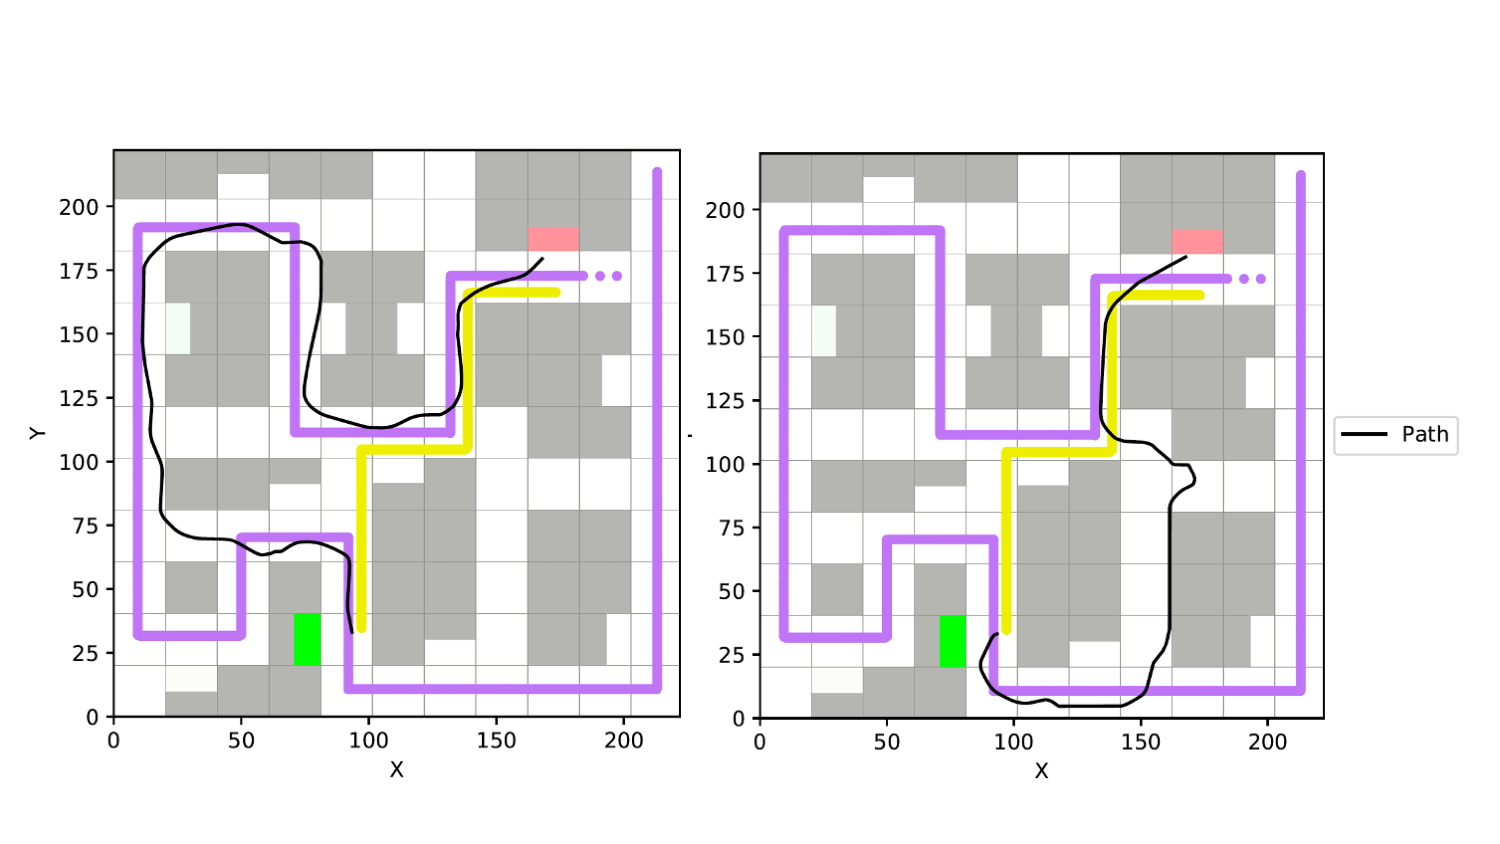

In [9]:
Image('sample_seven.png')

The left graph shows a learned liberal and the right graph shows a shortcut liberal.

In [10]:
labels9 = pd.read_csv('labels9.csv')

There are some misalignments between the trajectory data and label data. The dataset contains some participants' trajectory data without path labels coded manually and it also has some path labels with orignial trajectory data missing. These cases were dropped later.

In [11]:
print(set(rawdata9.PartNo.unique()).difference(set(labels9.PartNo.unique())))
print(set(labels9.PartNo.unique()).difference(set(rawdata9.PartNo.unique())))

{'209BOSS', '507', '604', '201BOSS'}
{'669', '667', '670', '668'}


When researchers mannually labelled path categories, some typos or captalization errors happened. The following code cleaned up these issues.

In [12]:
cleanup_lab = {"PathLabel": {"Failure": "failure",\
                             "Reverse Learned": "rev learned",\
                             "reversed learned":"rev learned",\
                            "reversed learned liberal": "rev learned liberal",\
                            "reverse learned": "rev learned",\
                            "Reverse learned": "rev learned",\
                            "Shortcut": "shortcut",\
                            "wandering":"uncodable",\
                            "Wandering":"uncodable",\
                            "Learned":"learned",\
                            "Rev Learned":"rev learned",\
                            "Reversed learned": "rev learned",\
                            "SHORTCUT":"shortcut",\
                            "sHORTCUT":"shortcut"}}
combine_lab = {"PathLabel": {"rev learned liberal": "rev learned",\
                            "uncodable": "other"}}
labels9.replace(cleanup_lab,inplace=True)

In [13]:
labels9.replace(combine_lab,inplace=True)

The following tabel shows the frequency of different classes. As it shows, most people take shortcut liberal (132 partipants) and learned liberal (75 participants) on this trial and a relatively few (20 participants) participants take the learned route. There are still some participants' routes hard to be classified into any of these classes. For example, they might wander a lot and ended up finding the target object. These routes were categorized as other.

In [14]:
labels9['PathLabel'].value_counts()

shortcut liberal    132
learned liberal      75
shortcut             65
failure              47
rev learned          42
learned              20
other                18
Name: PathLabel, dtype: int64

Two sample *other* routes were shown below:

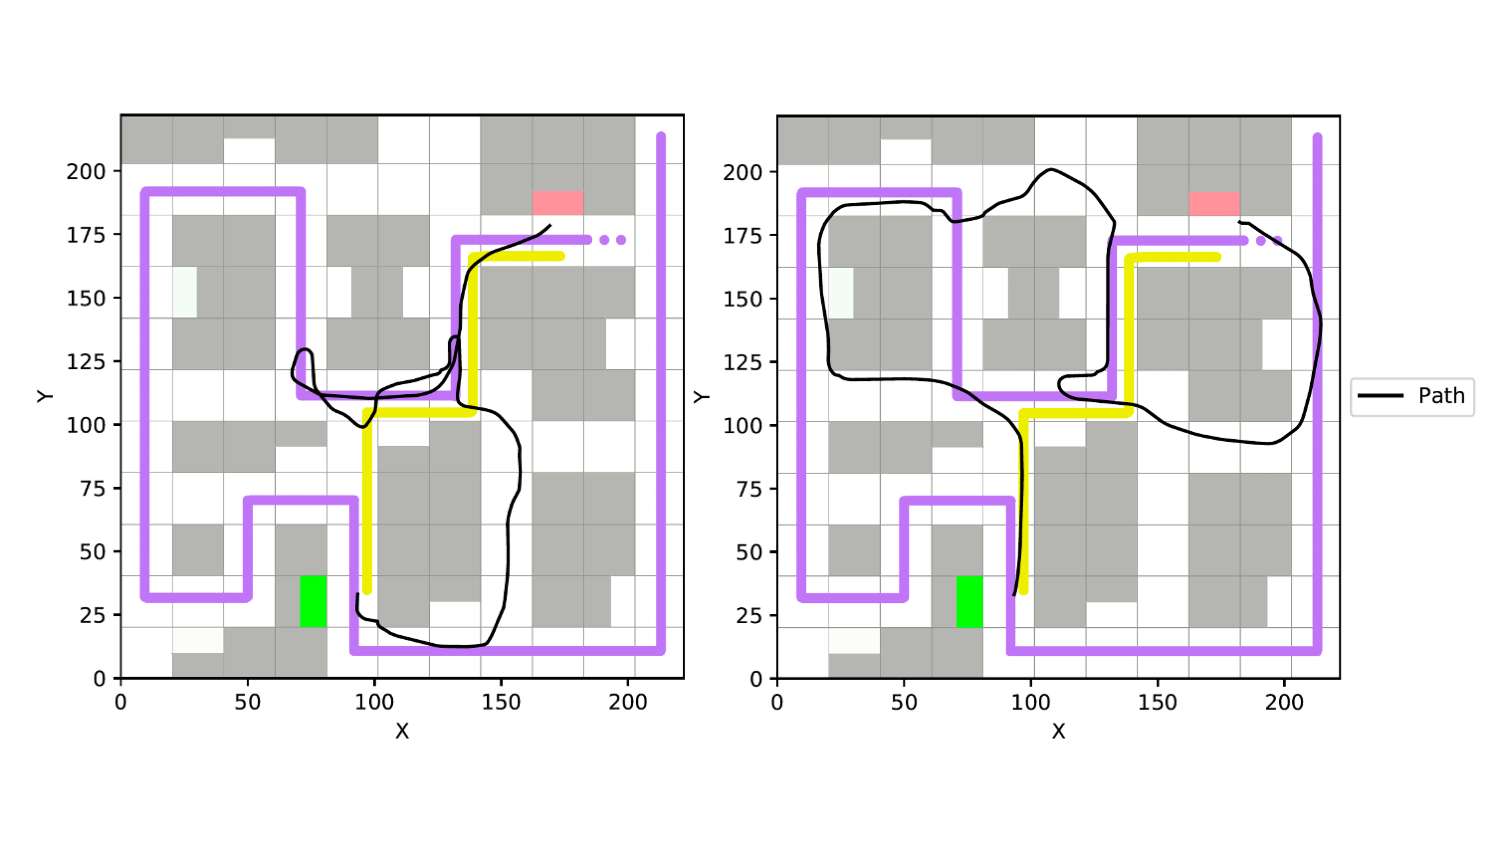

In [15]:
Image('sample_six.png')

In [16]:
labels9 = labels9.set_index(['PartNo'])
rawdata9 = rawdata9.set_index(['PartNo'])

### Heatmap of Locations in Trial 9

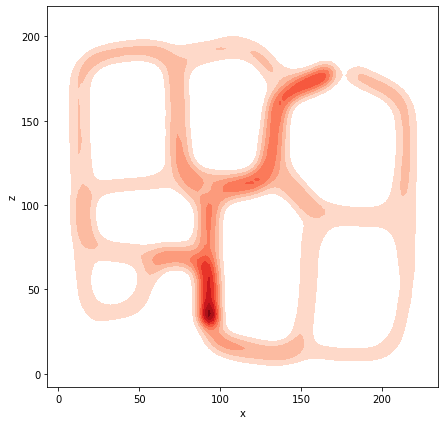

In [17]:
plt.figure(figsize=(7,7))
ax = sns.kdeplot(rawdata9.x, rawdata9.z,
                 cmap="Reds", shade=True, shade_lowest=False)

Heatmaps of all participants’ locations in the virtual environment were created to assess how frequently participants navigated to each location in the maze. Each location (x, z) counted as a move. Heatmaps represent the distribution of moves by using a kernel density estimate to show the probability density function of the moves. A higher probability (redder area) means participants visited the corresponding location more frequently. As shown in the plot above, most cases, participants would step on the shortcut of this trial (from the bottom of this map to the right top of the map). However, people also visit different places all over the maze.

### Discretize Paths

As shown in the path plots above, the raw coordinates are in very high resolution (locations were recorded per 100ms). However, the details won't influence how to classify the overall spatial structure of the path. To save computation cost and speed up the classification, the main preprocess I conducted is discretizing paths. 

The first step I did was sampling the coordinates from the raw coordinates set and set *random_state* as one. Half unbiased sample is enough to capture the main spatial features of the paths.

In [18]:
rawdata9_sample = rawdata9.sample(n=int((rawdata9.shape[0]+1)/2), random_state=1).sort_values(by=['PartNo','Time'])

Then I set up a 11 by 11 grid to detect whether there is a portion of the coordinates fell in each cell of the grid map. If there are coordinates located in a cell, the coordinates of the center of the cell was assigned to the corresponding coordinates. The coordinates (x and z) of the centers were stored in `xctr` and `yctr` respectively.

In [19]:
xgrid = np.linspace(2, 224, 12)
ygrid = np.linspace(1, 216.5, 12)
xctr = xgrid[:-1] + np.diff(xgrid)/2
yctr = ygrid[:-1] + np.diff(ygrid)/2
xctr = xctr.astype(int)
yctr = yctr.astype(int)
print('xctr is: ', xctr)
print('yctr is: ', yctr)

xctr is:  [ 12  32  52  72  92 113 133 153 173 193 213]
yctr is:  [ 10  30  49  69  89 108 128 147 167 187 206]


In [20]:
# get the discretized coordinates
discre9 = pd.concat(
    [pd.cut(rawdata9_sample['x'], xgrid, labels=xctr),
    pd.cut(rawdata9_sample['z'], xgrid, labels=yctr)],
    axis=1
).astype('int').rename(columns={"x": "x_d", "z": "z_d"})

# combine the real coordinates and discretized coordinates together
trac_discre9 = pd.concat({'approx':discre9, 'real':rawdata9_sample}, axis=1)
trac_discre9.head()

approx        real                                
           x_d z_d PartGen Trial  Time         x         z
PartNo                                                    
101BOSS     92  30       1     9  0.02  93.39999  33.10000
101BOSS     92  30       1     9  1.40  93.35425  33.09437
101BOSS     92  30       1     9  1.42  93.30838  33.08678
101BOSS     92  30       1     9  1.45  93.17668  33.05648
101BOSS     92  30       1     9  1.50  92.88060  32.94977

As shown in the table above, the discretized coordinates `x_d` and `z_d` were added to the original `rawdata9`. That is to say, if original coordinates `x` and `z` falls in a certain cell, the center of the cell were assigned to this location. The plots below show how noninformative details were removed after I discretized the paths.

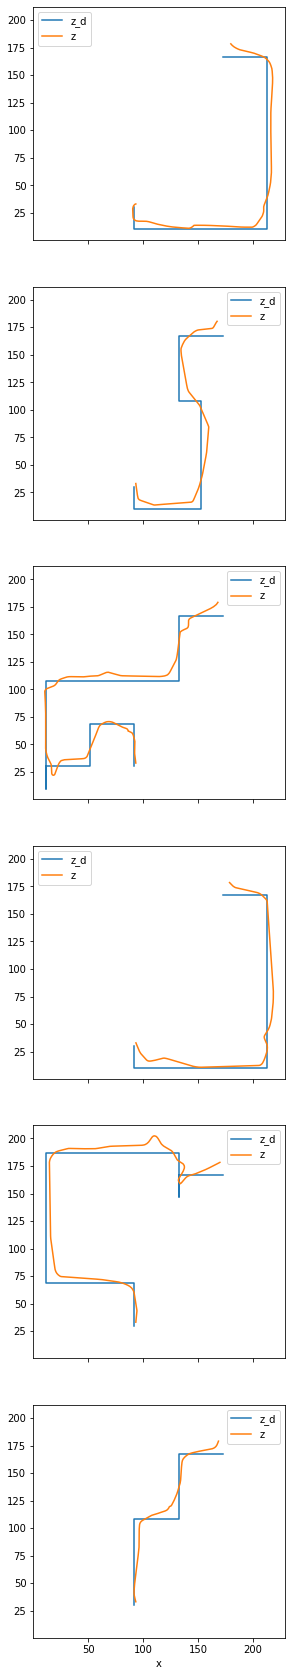

In [21]:
figcount = 6
fig, axs = plt.subplots(figcount, 1, sharex=True, sharey=True, figsize=(5, figcount*5), )

c = 0
for g, one in trac_discre9.groupby(['PartNo']):
    
    axs[c].set_aspect('equal', 'box')
    one['approx'].plot(x='x_d', y='z_d', ax=axs[c])
    one['real'].plot(x='x', y='z', ax=axs[c])
    
    c += 1
    
    if c >= figcount:
        break

As shown in the plots above, the discretized paths still have the enough information for categorizing paths into different classes. After eyeballing these plots, the first and forth plot are the reversed learned route and the second plot shows a route similar to a shortcut which maybe a shortcut liberal. The third route is more similar to a learned route liberal and the fifth plot is more likely to be a learned route. The sixth plot is a shortcut.

The duplicates of the centers are not informative. A single center in the right time order can reflect the general path taken. Thus, the duplicates were removed and a `coord` field were added to show the corresponding coordinates. This field will be used in several steps later to find the end location of the path.

In [22]:
trac_discre9_nodup = trac_discre9.copy()
trac_discre9_nodup.columns = trac_discre9_nodup.columns.get_level_values(1)
trac_discre9_nodup = trac_discre9_nodup.drop(columns=['Time','x','z']).reset_index()\
    .drop_duplicates(["PartNo","x_d","z_d"],keep='last')\
    .set_index(['PartNo'])

trac_discre9_nodup['coord']=trac_discre9_nodup.apply(lambda x: [x.x_d,x.z_d],axis=1)

Another way to represent location is assigning each location a letter and generate a string of text to indicate the path. The usage of this representation will be explained later. The following codes are used to get this representation.

In [23]:
## set up a letter pools to indicate the coordinates of the centers
xctr_alp = ['a','b','c','d','e','f','g','h','i','g','k']
yctr_alp = ['A','B','C','D','E','F','G','H','I','G','K']
## use the letters to represent each coordinates
trac_discre9_nodup['x_a'] = trac_discre9_nodup.apply(lambda row: xctr_alp[np.where(xctr == row.x_d)[0].item()],axis=1)
trac_discre9_nodup['z_a'] = trac_discre9_nodup.apply(lambda row: xctr_alp[np.where(yctr == row.z_d)[0].item()],axis=1)
trac_discre9_nodup['coord_a'] =trac_discre9_nodup.apply(lambda x: x.x_a+x.z_a,axis=1)
## show the final data set used to extract the spatial features of the paths
trac_discre9_nodup.head()

,x_d,z_d,PartGen,Trial,coord,x_a,z_a,coord_a
PartNo,,,,,,,,
101BOSS,92,30,1,9,"[92, 30]",e,b,eb
101BOSS,92,10,1,9,"[92, 10]",e,a,ea
101BOSS,113,10,1,9,"[113, 10]",f,a,fa
101BOSS,133,10,1,9,"[133, 10]",g,a,ga
101BOSS,153,10,1,9,"[153, 10]",h,a,ha


## Classification Model Development and Validation
Before classifying the paths, the main spatial features of the paths should be extracted from the raw coordinates
### Route Representation
The raw coordinates were grouped by each participant and two different representations were developed using the raw coordinates. The first representation is 0/1 matrix based on the grid map. In this representation, the overall environment were devided into 11 by 11 grid and if the route taken by the participant went through a cell of the grid, the corresponding cell should be 1, and other cells are 0. This representation can be used to detect the overlapping steps between the path taken by participants and the optimal shortcuts or the learned route (more details below). However, this representation does not contain the direction information. That is to say, researcher cannot know from which direction participants went through the cell.

Another route representation used to consider the direction information is the text or string representation. Each location is represented by two characters and the whole string represents the whole path and the order of the letters contain the information of the direction.

The following codes shows the development of these representations by participant.

In [24]:
##define the function to develop the route representations
def pathrep(x):
    d = {}
    tmp_coord_M = pd.DataFrame(index=yctr[::-1], columns=xctr) ## set up 11 by 11 grid
    tmp_coord_a = ''
    for [i,j] in x.coord:
        tmp_coord_M.loc[j,i]=1 ## assign 1 or 0 based on the coordinates
    for test in x.coord_a:
        tmp_coord_a = tmp_coord_a + test ## develop the string representation of the route
    d['pathmatrix']=tmp_coord_M.replace(np.nan, 0).to_numpy()
    d['pathtext']=tmp_coord_a
    return pd.Series(d, index=['pathmatrix','pathtext'])

In [25]:
## construct the representations for each participant' route based on the algorithm
pathmatrix9 = trac_discre9_nodup.groupby(['PartNo']).apply(pathrep)
pathmatrix9.head()

,pathmatrix,pathtext
PartNo,,
101BOSS,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...",ebeafagahaiagakakbkckdkekfkgkhkigiii
102BOSS,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...",ebeafagahahbhchdhehfgfggghgihiii
103BOSS,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...",ebecedddcdcccbbbaaabacadaeafbfcfdfefffgfggghgi...
104BOSS,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...",ebeafagahaiagakakbkckdkekfkgkhkigiii
105BOSS,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, ...",ebecedddcdbdadaeafagahaiagbgcgdgegfgggghgihiii


Based on previous visualizations, it is noticed that the typical shortcut, typical learned route, and typical reversed learned route were taken by participants with participant ID *227BOSS*, *632* and *510* respectively. These paths were extracted and other paths were compared to these typical paths to get corresponding features in the following analysis.

In [26]:
sc9 = pathmatrix9.loc['227BOSS','pathmatrix']
lr9 = pathmatrix9.loc['632','pathmatrix']
rv9 = pathmatrix9.loc['510','pathmatrix']
sc9_a = pathmatrix9.loc['227BOSS','pathtext']
lr9_a = pathmatrix9.loc['632','pathtext']

In [27]:
# the typical shortcut of Trial 9 (0/1 matrix representation)
sc9

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
# the typical learned route of Trial 9 (0/1 matrix representation)
lr9

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
# the typical reversed learned route of Trial 9 (0/1 matrix representation)
rv9

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

In [30]:
# the typical learned route of Trial 9 (text representation)
lr9_a

'ebecedddcdcccbbbabacadaeafagahaiagbgcgdgdidhdgdfefffgfggghgihiii'

In [31]:
# the typical shortcut of Trial 9 (text representation)
sc9_a

'ebecedeeefffgfggghgihiii'

### Feature Engineering

The first important feature of the path is its ending location, `endloc`. If participants end at the target location, we can imply that they reach the target location. Otherwise, they failed to find the target location and we need to categorize the route as a failure.

The second feature is the total steps participants taken, `total`. It can be counted based on the 0/1 matrix representation of the path.

The third feature is the number of steps overlapping with the optimal shortcut, `sc`. It can be counted based on the Hadamard product of the 0/1 matrix representation of the shortcut and that of the participant' path.

In a similiar way, it is essential to know the number of steps overlapping with the learned route (`lr`) and the reverse learned route (`rv`).

Based on these features, the ratio features can be calcluated. It includes the ratio of the total steps to the learned route steps (`total_vs_learn`), the ratio of total steps to the optimal shortcut steps (`total_vs_shortcut`), the ratio of the steps overlapping with the learned route to the total steps (`lr_vs_total`), the ratio of the steps overlapping with the reversed learned route to the total steps (`rv_vs_total`).

As discussed above, these features didn't contain the direction information. Another kind of feature is the edit distance between the string representation of the route between the target route, such as learned route, and the measured path. [Edit distance](https://en.wikipedia.org/wiki/Edit_distance) is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other. If participants went through similiar cells but in a different direction, the edit distance would be larger comparing to that of going in the same direction. Using [difflib](https://pymotw.com/3/difflib/#comparing-arbitrary-types) python module, the similiarity based the edit distance of two route can be calculated. `lr_a_sim` indicates the similiarity between participants' routes to the learned route and `sc_a_sim` indicates the similiarity between participants' routes to the optimal shortcut. They range between 0 and 1 and a value closer to 1 indicates a higher similarity

In [32]:
pathmatrix9_sum=pathmatrix9.copy()
# ending location
pathmatrix9_sum['endloc'] = trac_discre9_nodup\
                            .groupby(['PartNo']).tail(1).coord

pathmatrix9_sum['total'] = pathmatrix9\
                            .apply(lambda row: sum(sum(row.pathmatrix)),axis=1)
pathmatrix9_sum['sc'] = pathmatrix9\
                            .apply(lambda row: sum(sum(sc9*row.pathmatrix)),axis=1)
pathmatrix9_sum['lr'] = pathmatrix9\
                            .apply(lambda row: sum(sum(lr9*row.pathmatrix)),axis=1)
pathmatrix9_sum['rv'] = pathmatrix9\
                            .apply(lambda row: sum(sum(rv9*row.pathmatrix)),axis=1)


pathmatrix9_sum['total_vs_learn'] = pathmatrix9_sum.apply(lambda row: row.total/sum(sum(lr9)),axis=1)
pathmatrix9_sum['total_vs_shortcut'] = pathmatrix9_sum.apply(lambda row: row.total/sum(sum(sc9)),axis=1)
pathmatrix9_sum['lr_vs_total'] = pathmatrix9_sum.apply(lambda row: row.lr/row.total,axis=1)
pathmatrix9_sum['rv_vs_total'] = pathmatrix9_sum.apply(lambda row: row.rv/row.total,axis=1)
pathmatrix9_sum['lr_a_sim'] = pathmatrix9_sum.apply(lambda row: \
                                                  difflib.SequenceMatcher(None,row.pathtext,lr9_a)\
                                                  .ratio(),axis=1)
pathmatrix9_sum['sc_a_sim'] = pathmatrix9_sum.apply(lambda row: \
                                                  difflib.SequenceMatcher(None,row.pathtext,sc9_a)\
                                                  .ratio(),axis=1)
pathmatrix9_sum=pathmatrix9_sum.drop(columns=['pathmatrix','pathtext'])

In [33]:
pathmatrix9_sum.head()

,endloc,total,sc,lr,rv,total_vs_learn,total_vs_shortcut,lr_vs_total,rv_vs_total,lr_a_sim,sc_a_sim
PartNo,,,,,,,,,,,
101BOSS,"[173, 167]",18,2,2,18,0.56250,1.500000,0.111111,1.000000,0.480000,0.366667
102BOSS,"[173, 167]",16,7,7,6,0.50000,1.333333,0.437500,0.375000,0.583333,0.607143
103BOSS,"[173, 167]",25,11,22,2,0.78125,2.083333,0.880000,0.080000,0.807018,0.621622
104BOSS,"[173, 167]",18,2,2,18,0.56250,1.500000,0.111111,1.000000,0.480000,0.366667
105BOSS,"[173, 167]",23,7,19,2,0.71875,1.916667,0.826087,0.086957,0.800000,0.571429


The descriptive statistics of these features across all participants are shown in the table below:

In [34]:
pathmatrix9_sum.drop(columns=['endloc']).describe().round(2).transpose().drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
total,20.57,7.07,12.00,16.00,18.00,26.00,40.00
sc,8.10,3.43,2.00,6.00,8.00,11.00,12.00
lr,13.43,8.47,2.00,7.00,12.00,18.00,32.00
rv,5.72,5.48,1.00,2.00,2.00,8.00,18.00
total_vs_learn,0.64,0.22,0.38,0.50,0.56,0.81,1.25
total_vs_shortcut,1.71,0.59,1.00,1.33,1.50,2.17,3.33
lr_vs_total,0.64,0.30,0.10,0.44,0.75,0.92,1.00
rv_vs_total,0.30,0.29,0.03,0.10,0.17,0.38,1.00
lr_a_sim,0.59,0.17,0.21,0.48,0.54,0.69,1.00
sc_a_sim,0.62,0.23,0.12,0.39,0.59,0.79,1.00


### Decision Tree Based on Domain Knowledge
#### Model Development

Based on the manual coding model developed in previous research, the following threshold and rules are defined in the following function to classify paths. 

In [35]:
def labelpath(x):
    ##if not ending at the target, it is categorized as a failure
    if x.endloc != [173,167]: 
        return'failure'
    ##exactly the same as the optimal shortcut
    elif x.total_vs_shortcut == 1.: 
        return 'shortcut'
    ##based on the total steps and directions
    elif ((x.total_vs_learn == 1.) & (x.lr_a_sim >.9)):
        return 'learned'
    ##total steps, the steps overlapping with learned route and reversed learned route
    elif ((x.total_vs_learn <=.84) & (x.rv_vs_total >=.7) & (x.lr_vs_total <.7)):
        return 'rev learned'
    ## steps overlapping with reversed  learned route, learned route and edit distance
    elif ((x.rv_vs_total < .7) & (x.total_vs_learn <=.84) & (x.lr_a_sim-x.sc_a_sim<0.2)):
        return 'shortcut liberal'
    elif ((x.rv_vs_total <.7) & (x.lr_vs_total >=.7) & (x.lr_a_sim-x.sc_a_sim>-0.3)):
        return 'learned liberal'
    elif ((x.rv_vs_total <.7) & (x.lr_vs_total <.7) & (x.lr_a_sim-x.sc_a_sim<-0.2)):
        return 'shortcut liberal'
    else: return 'other'

Note that the main different feature between this algorithm and previous manual coding model is the overlapping learned route steps. In the previous coding model, since people can visually count each step, it considers the direction of the path participants took, if the overlapping steps went through the cell in opposite direction, it will not be counted as overlapping steps.

As shown in the image below, the black and purple route went through the same left top cells in opposite directions. Thus, this direction information cannot be captured by 0/1 matrix representation but can be reflected by the string representation. Two new features used in the algorithm as opposed to the original manual coding model are `lr_sim` and `sc_sim` based on the edit distance between different string representation.

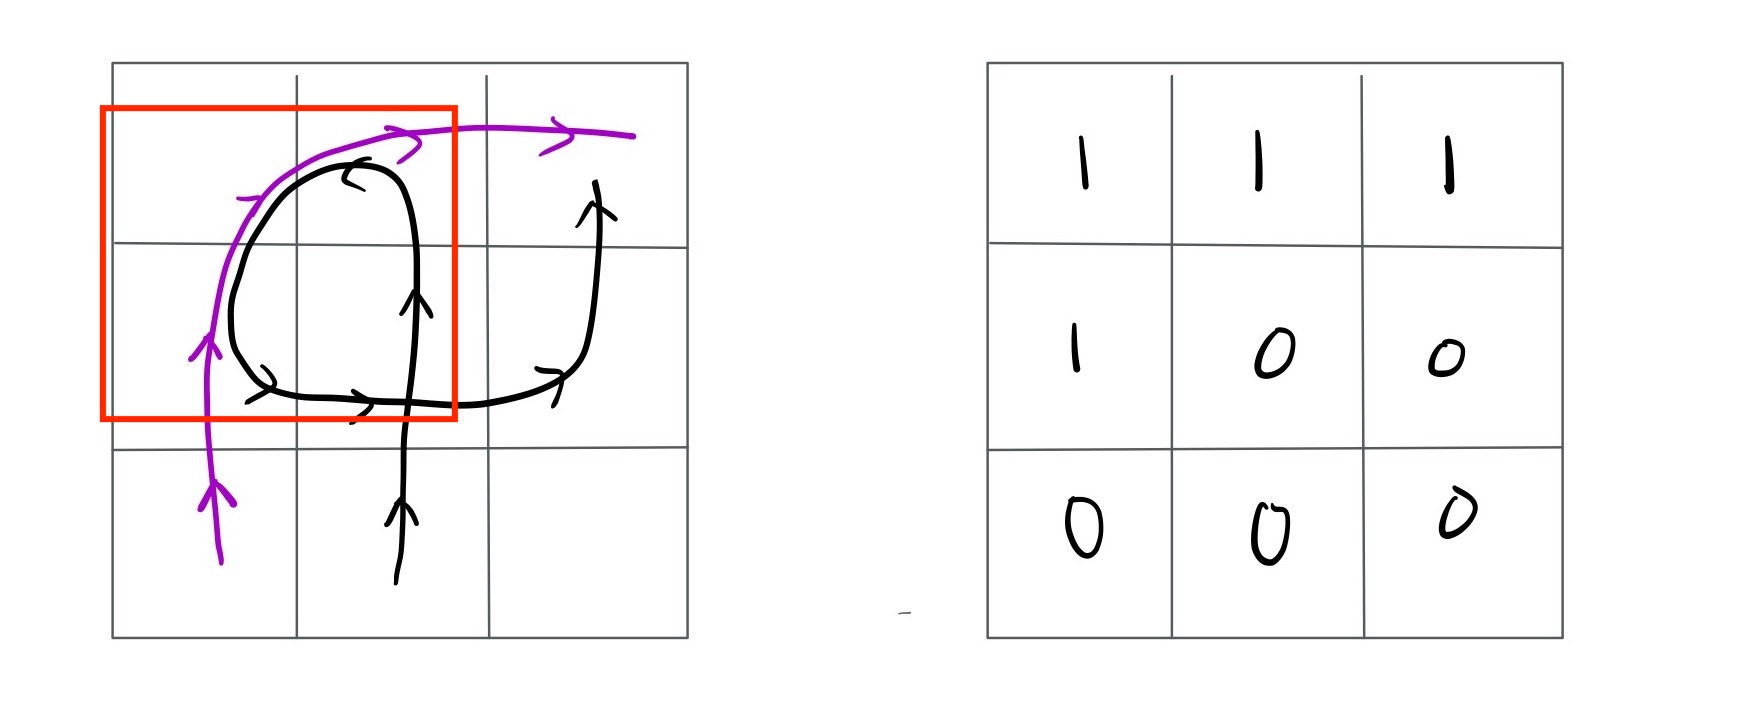

In [36]:
Image('pathdirection_four.jpg')

In [37]:
# categorize route based on the decision tree model above and store the labels
pathmatrix9_sum['label'] = pathmatrix9_sum.apply(lambda x: labelpath(x), axis=1)
pathmatrix9_sum.head()

,endloc,total,sc,lr,rv,total_vs_learn,total_vs_shortcut,lr_vs_total,rv_vs_total,lr_a_sim,sc_a_sim,label
PartNo,,,,,,,,,,,,
101BOSS,"[173, 167]",18,2,2,18,0.56250,1.500000,0.111111,1.000000,0.480000,0.366667,rev learned
102BOSS,"[173, 167]",16,7,7,6,0.50000,1.333333,0.437500,0.375000,0.583333,0.607143,shortcut liberal
103BOSS,"[173, 167]",25,11,22,2,0.78125,2.083333,0.880000,0.080000,0.807018,0.621622,shortcut liberal
104BOSS,"[173, 167]",18,2,2,18,0.56250,1.500000,0.111111,1.000000,0.480000,0.366667,rev learned
105BOSS,"[173, 167]",23,7,19,2,0.71875,1.916667,0.826087,0.086957,0.800000,0.571429,learned liberal


#### Model Validation
After classifying the path using the model developed, the original manual labels are combined to the resulting dataframe to compare the consistency between two labels. The confusion matrix, average consistency and discussions on inconsistent cases are shown below.

In [38]:
# combine automatic labels and manual labels
compare9 = pathmatrix9_sum.join(labels9).dropna()
compare9.columns

Index(['endloc', 'total', 'sc', 'lr', 'rv', 'total_vs_learn',
       'total_vs_shortcut', 'lr_vs_total', 'rv_vs_total', 'lr_a_sim',
       'sc_a_sim', 'label', 'PathLabel'],
      dtype='object')

In [39]:
# confusion matrix between the automatic labels based on model and manual labels
pd.crosstab(compare9.label, compare9.PathLabel,margins=True, margins_name="Total")

PathLabel,failure,learned,learned liberal,other,rev learned,shortcut,shortcut liberal,Total
label,,,,,,,,
failure,44,0,0,0,0,0,0,44
learned,0,18,1,0,0,0,0,19
learned liberal,1,1,36,1,1,0,1,41
other,2,0,0,12,0,0,0,14
rev learned,0,1,0,0,40,1,1,43
shortcut,0,0,0,0,0,64,0,64
shortcut liberal,0,0,37,5,0,0,128,170
Total,47,20,74,18,41,65,130,395


In [40]:
compare9['consistency'] = np.where(compare9.label==compare9.PathLabel, 1, 0)
print('The consistency between two labels: ', round(sum(compare9.consistency)/compare9.shape[0],4))

The consistency between two labels:  0.8658


The inconsistent cases were examined to investigate the possible issues of the model
* **Case 1: categorizing a learned liberal as a learned route**

In [41]:
compare9[(compare9.consistency==0) & (compare9.label=='learned')]

,endloc,total,sc,lr,rv,total_vs_learn,total_vs_shortcut,lr_vs_total,rv_vs_total,lr_a_sim,sc_a_sim,label,PathLabel,consistency
PartNo,,,,,,,,,,,,,,
212BOSS,"[173, 167]",32,11,32,2,1.0,2.666667,1.0,0.0625,1.0,0.522727,learned,learned liberal,0


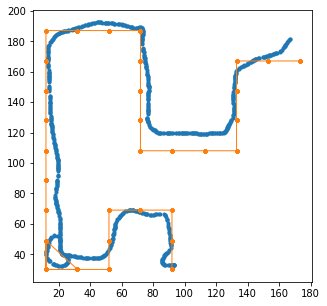

In [42]:
plt.figure(figsize=(5,5))
plt.plot('x','z',data=trac_discre9.loc['212BOSS','real'], marker=".",linewidth=0)
plt.plot('x_d','z_d',data=trac_discre9.loc['212BOSS','approx'], marker=".",linewidth=1)

This inconsistent case was caused by path discretization. Based on the domain knowledge, the retracing steps at the left bottom areas could be ignore and it is okay to say the route is a learned route. However, if the goal of a study needs to consider the retracing behaviors in a virtual maze, this issue detected may need to be further considered.
* **Case 2: categorizing failures as others**

In [43]:
compare9[(compare9.consistency==0) & (compare9.label=='other')]

,endloc,total,sc,lr,rv,total_vs_learn,total_vs_shortcut,lr_vs_total,rv_vs_total,lr_a_sim,sc_a_sim,label,PathLabel,consistency
PartNo,,,,,,,,,,,,,,
139BOSS,"[173, 167]",38,8,25,8,1.18750,3.166667,0.657895,0.210526,0.742857,0.380000,other,failure,0
633,"[173, 167]",33,10,14,13,1.03125,2.750000,0.424242,0.393939,0.400000,0.488889,other,failure,0


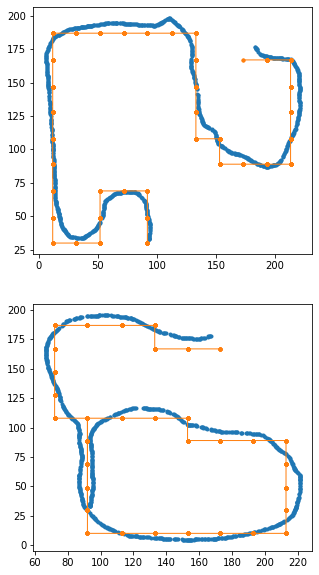

In [44]:
fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].plot('x','z',data=trac_discre9.loc['139BOSS','real'], marker=".",linewidth=0)
axs[0].plot('x_d','z_d',data=trac_discre9.loc['139BOSS','approx'], marker=".",linewidth=1)
axs[1].plot('x','z',data=trac_discre9.loc['633','real'], marker=".",linewidth=0)
axs[1].plot('x_d','z_d',data=trac_discre9.loc['633','approx'], marker=".",linewidth=1)

As shown in the plots above, participants reached the target goal so they should not be classified as failures. The reason that the previous manual labels counted it as failure may be that although participants reached the target, they failed to trigger the next trial in the virtual environment (VR) within the time limit so that the Unity3D program counted it as a failure automatically. The two paths shown should be counted as other route since they do not follow the learned route or reversed learned route and definitely are not a shortcut due to some wanderings. Thus, the automatic coding wins.
* **Case 3: different routes categorized as reversed learned**

In [45]:
compare9[(compare9.consistency==0) & (compare9.label=='rev learned')]

,endloc,total,sc,lr,rv,total_vs_learn,total_vs_shortcut,lr_vs_total,rv_vs_total,lr_a_sim,sc_a_sim,label,PathLabel,consistency
PartNo,,,,,,,,,,,,,,
101BOSS,"[173, 167]",18,2,2,18,0.5625,1.500000,0.111111,1.0,0.480000,0.366667,rev learned,learned,0
413BOSS,"[173, 167]",18,2,2,18,0.5625,1.500000,0.111111,1.0,0.480000,0.366667,rev learned,shortcut,0
541,"[173, 167]",20,2,2,14,0.6250,1.666667,0.100000,0.7,0.384615,0.312500,rev learned,shortcut liberal,0


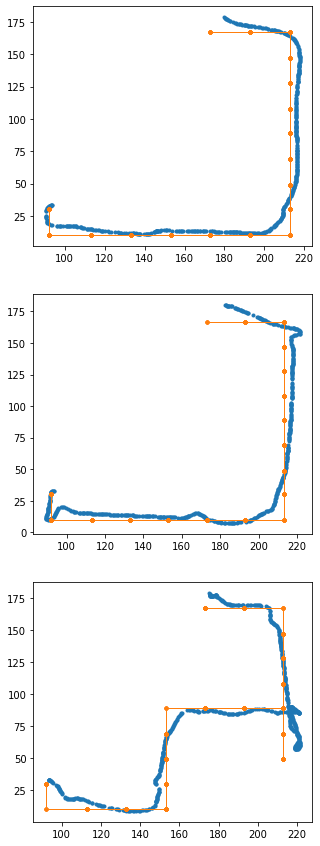

In [46]:
fig, axs = plt.subplots(3,figsize=(5,15))
axs[0].plot('x','z',data=trac_discre9.loc['101BOSS','real'], marker=".",linewidth=0)
axs[0].plot('x_d','z_d',data=trac_discre9.loc['101BOSS','approx'], marker=".",linewidth=1)
axs[1].plot('x','z',data=trac_discre9.loc['413BOSS','real'], marker=".",linewidth=0)
axs[1].plot('x_d','z_d',data=trac_discre9.loc['413BOSS','approx'], marker=".",linewidth=1)
axs[2].plot('x','z',data=trac_discre9.loc['541','real'], marker=".",linewidth=0)
axs[2].plot('x_d','z_d',data=trac_discre9.loc['541','approx'], marker=".",linewidth=1)

As shown in the plots above, participants with ID *101BOSS* and *431BOSS* reached the target goal using the reversed learned route so the automatic coding wins. There might be some errors in the manual coding. However, the route used by participants with ID *541* is controversial. It used a route similiar to the reversed learned route, it can be counted as a reversed learned route if setting the threshold more liberally but it can also be counted as a *other* route. However, the manual coding count it as a shortcut liberal but the similiarity of this route to the shortcut is even less than the actual reversed learned route. Thus, I believe it makes more sense to classify it as a reversed learned route than a shortcut liberal. In general, the automatic coding wins in these cases as well.
* **Case 4: unclear learned liberal routes**

As shown in the confusion matrix, the most inconsistent cases happened in the learned liberal category. Here are two routes which are counted as shortcut liberal in the automatic coding but learned route liberal in the manual coding.

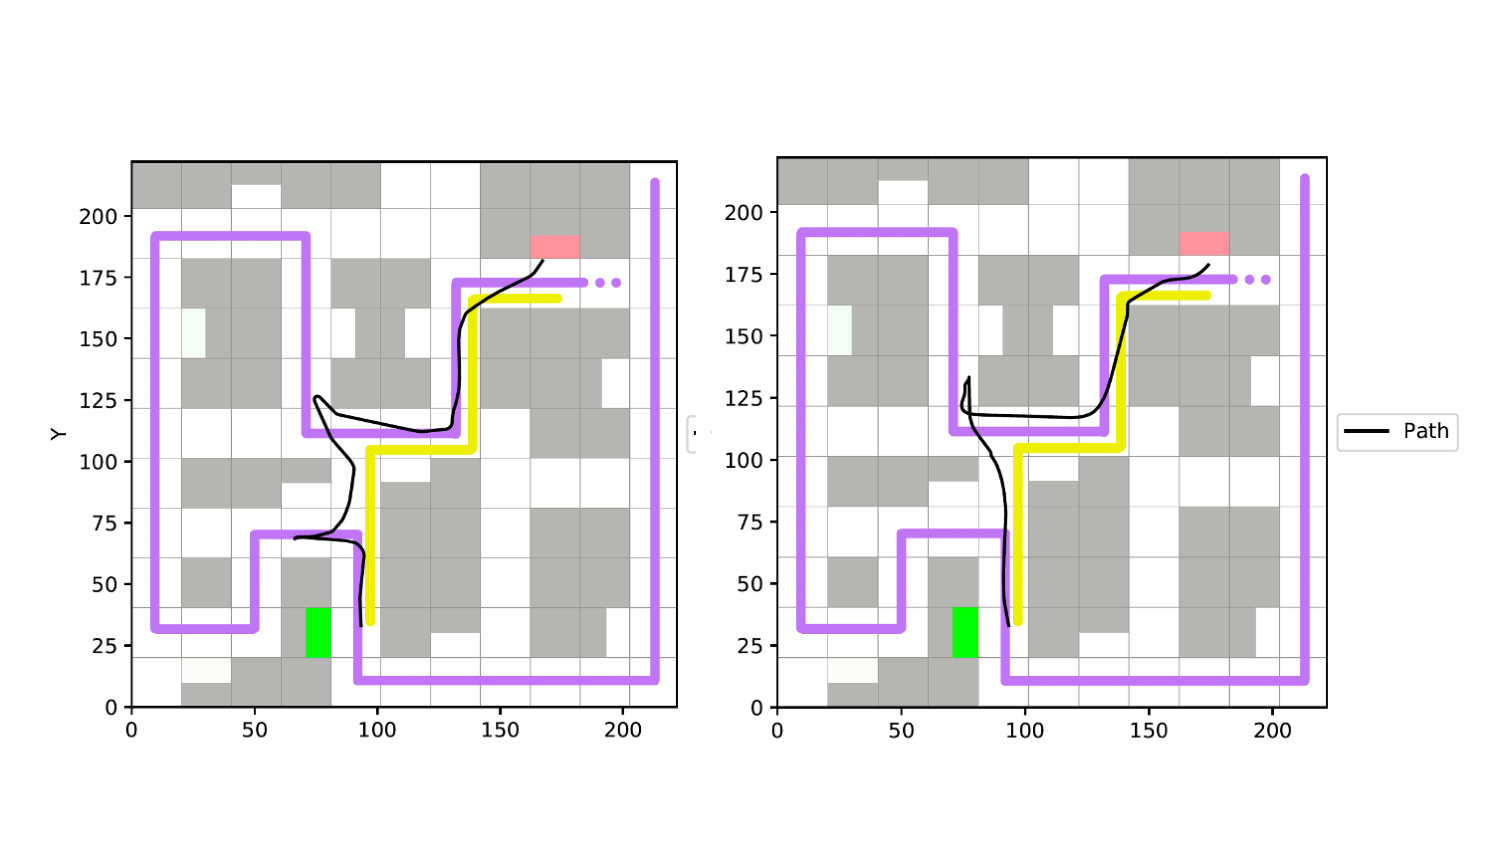

In [47]:
Image('shortcutliberal_five.png')

In [48]:
compare9[(compare9.consistency==0) & (compare9.label=='shortcut liberal')].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
total,42.0,18.55,4.12,13.00,14.00,20.00,21.00,26.00
sc,42.0,11.33,1.26,6.00,11.00,12.00,12.00,12.00
lr,42.0,15.86,3.74,11.00,13.00,17.00,19.00,23.00
rv,42.0,2.33,1.16,2.00,2.00,2.00,2.00,8.00
total_vs_learn,42.0,0.58,0.13,0.41,0.44,0.62,0.66,0.81
total_vs_shortcut,42.0,1.55,0.34,1.08,1.17,1.67,1.75,2.17
lr_vs_total,42.0,0.86,0.09,0.52,0.85,0.88,0.93,0.93
rv_vs_total,42.0,0.13,0.06,0.08,0.10,0.12,0.14,0.35
lr_a_sim,42.0,0.64,0.10,0.47,0.58,0.63,0.72,0.82
sc_a_sim,42.0,0.78,0.12,0.54,0.70,0.73,0.92,0.96


As shown in the plots and table above, these paths have many steps overlapping with the shortcut as well as the learned route. Thus, it is hard to set up rules or thresholds. More analysis should be done in the future and the thresholds may be adjusted according to different research questions.

### Supervised Learning: Random Forests
[Random forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,prediction%20(regression)%20of%20the%20individual) or random decision forests are an ensemble learning method for classification tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. It can help us automatically develop useful trees without manually testing different decision rules. But the disadvantage is that it is hard to interpret the meaning of decision rules of the resulting tree.

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

The redundant features (or the features has linear relationships with other features) were removed and the tuple feature `endloc` were split into `end_x` and `end_z`. The new feature table and the manual coding (target classes) were split into the training set and test set. The training set was used to train the random forest model and the test set was used to test the performance of the classification. The score (or the accuracy of the classification) was measured by averaging the results of 5-fold cross validation. 

In [50]:
compare9['end_x'] = compare9\
                .apply(lambda row: row.endloc[0],axis=1)
compare9['end_z'] = compare9\
                .apply(lambda row: row.endloc[1],axis=1)
modeldata9_rf = compare9.copy()[['total','sc','lr','rv','lr_a_sim','sc_a_sim','end_x','end_z','label','PathLabel']]
modeldata9_rf.head()

,total,sc,lr,rv,lr_a_sim,sc_a_sim,end_x,end_z,label,PathLabel
PartNo,,,,,,,,,,
101BOSS,18,2,2,18,0.480000,0.366667,173,167,rev learned,learned
102BOSS,16,7,7,6,0.583333,0.607143,173,167,shortcut liberal,shortcut liberal
103BOSS,25,11,22,2,0.807018,0.621622,173,167,shortcut liberal,learned liberal
104BOSS,18,2,2,18,0.480000,0.366667,173,167,rev learned,rev learned
105BOSS,23,7,19,2,0.800000,0.571429,173,167,learned liberal,learned liberal


In [51]:
X_train, X_test, y_train, y_test = train_test_split(modeldata9_rf[modeldata9_rf.columns[0:8]], modeldata9_rf['PathLabel'],random_state=0)

In [52]:
rf = RandomForestClassifier(n_estimators=9, max_depth=None,
                            min_samples_split=2, random_state=0)
rf.fit(X_train,y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print('the average accuracy: ', round(rf_scores.mean(),4))

the average accuracy:  0.9358


The classification accuracy of the random forest model is higher than the decision tree developed in the previous section based on the domain knowledge. The table and graph below shows the confusion matrix.

Confusion matrix, without normalization
[[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  2  9  0  0  0  0]
 [ 0  0  2  4  0  0  1]
 [ 0  0  0  0  9  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  1  1  0  0 32]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.18181818 0.81818182 0.         0.         0.
  0.        ]
 [0.         0.         0.28571429 0.57142857 0.         0.
  0.14285714]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.02941176 0.02941176 0.         0.
  0.94117647]]


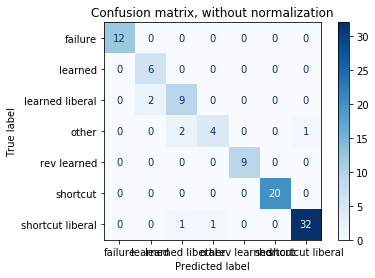

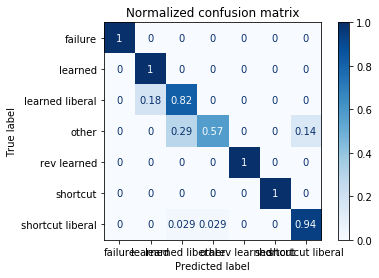

In [53]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [54]:
# The importance table of different features
d = {'feature': X_train.columns.to_list(),'Importance':rf.feature_importances_.tolist()}
pd.DataFrame(d)

,feature,Importance
0,total,0.194966
1,sc,0.087166
2,lr,0.114531
3,rv,0.182861
4,lr_a_sim,0.144343
5,sc_a_sim,0.148329
6,end_x,0.044752
7,end_z,0.083051


As discussed above, the random forest model can help us automatically develop a useful tree without manually testing different decision rules. Also, the result shows that it has a higher accuracy. However, more scrutiny should be done for the misclassified cases and researchers should be cautious about the interpretation of the resulting decision rules.

## Conclusion

This project conducted feature engineering on the spatial trajectory data and classified the routes using domain knowledge as well as random forests. It closely examined the spatial features that may influence the trajectory classifications and discuss the pros and cons of setting up domain-knowledge decision rules versus using a machine learning model.

The methods can be used for future spatial trajectory classifications and the results of feature engineering and classifications can be treated as dependent variables for other scientific questions, such as the sex differences or cultural differences in the route choice and individual differences in sense of directions.